In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import PCA # library for PCA generation
import matplotlib.pyplot as plt # for plotting different graph
import seaborn as sns # for violin graph

In [119]:
# Source of dataset
train_data = 'ROSMAP/2_tr.csv'
test_data = 'ROSMAP/labels_tr.csv'

In [120]:
train_df=pd.read_csv(train_data) #Replace it with your path where the data file is stored
labels_df=pd.read_csv(test_data) #Replace it with your path where the data file is stored
#df.head() #It shows top 5 rows of data matrix

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Columns: 1000 entries, 2.009664663689423869e-01 to 4.016249924627335877e-01
dtypes: float64(1000)
memory usage: 2.0 MB


In [122]:
X = train_df.iloc[:,1:]  # all rows, all the features and no labels
y = labels_df.iloc[:, -1] # all rows, label only

In [123]:
y

0      1.0
1      1.0
2      0.0
3      0.0
4      0.0
      ... 
239    0.0
240    1.0
241    0.0
242    1.0
243    1.0
Name: 0.000000000000000000e+00, Length: 244, dtype: float64

In [124]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [125]:
x_pca = pca.transform(X)

In [126]:
x_pca.shape

(244, 2)

Text(0, 0.5, 'Second Principal Component')

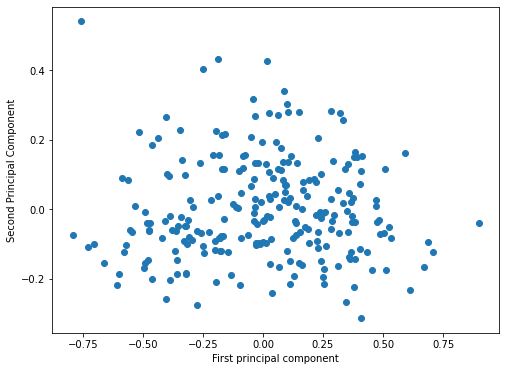

In [127]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1])
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

/var/folders/j8/xcllb4g96fzf8q6mkjmc60lw0000gp/T/ipykernel_4364/3588015294.py:6: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.scatterplot(x="PCA1", y="PCA2", hue=PCA_df.y.tolist(),


[Text(0.5, 1.0, 'PCA projection')]

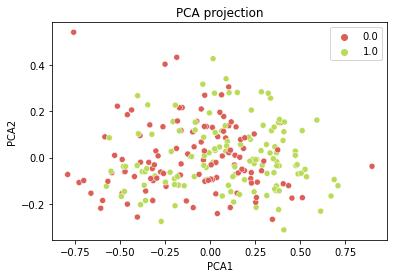

In [128]:
PCA_df = pd.DataFrame()
PCA_df["y"] = y
PCA_df["PCA1"] = x_pca[:,0]
PCA_df["PCA2"] = x_pca[:,1]

sns.scatterplot(x="PCA1", y="PCA2", hue=PCA_df.y.tolist(),
                palette=sns.color_palette("hls", 5),
                data=PCA_df).set(title="PCA projection")

<AxesSubplot: xlabel='0.000000000000000000e+00', ylabel='PCA1'>

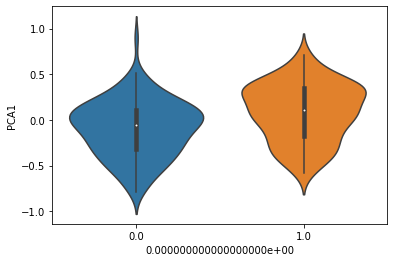

In [129]:
sns.violinplot(data=PCA_df, x=y, y=PCA_df["PCA1"])

<AxesSubplot: xlabel='0.000000000000000000e+00', ylabel='PCA2'>

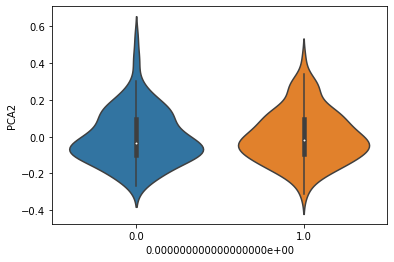

In [130]:
sns.violinplot(data=PCA_df, x=y, y=PCA_df["PCA2"])

In [131]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(X)

/usr/local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 244 samples in 0.001s...
[t-SNE] Computed neighbors for 244 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 244 / 244
[t-SNE] Mean sigma: 0.182279
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.218613
[t-SNE] KL divergence after 1000 iterations: 0.732079


/var/folders/j8/xcllb4g96fzf8q6mkjmc60lw0000gp/T/ipykernel_4364/2245778709.py:6: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.scatterplot(x="tSNE1", y="tSNE2", hue=tSNE_df.y.tolist(),


[Text(0.5, 1.0, 'tSNE projection')]

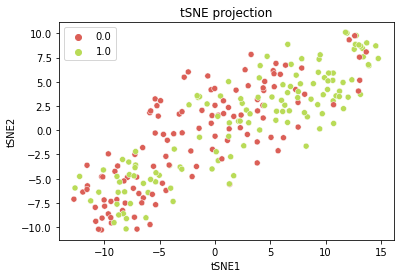

In [132]:
tSNE_df = pd.DataFrame()
tSNE_df["y"] = y
tSNE_df["tSNE1"] = z[:,0]
tSNE_df["tSNE2"] = z[:,1]

sns.scatterplot(x="tSNE1", y="tSNE2", hue=tSNE_df.y.tolist(),
                palette=sns.color_palette("hls", 5),
                data=tSNE_df).set(title="tSNE projection")

<AxesSubplot: xlabel='0.000000000000000000e+00', ylabel='tSNE1'>

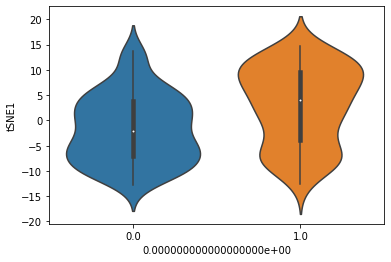

In [133]:
sns.violinplot(data=tSNE_df, x=y, y=tSNE_df["tSNE1"])

<AxesSubplot: xlabel='0.000000000000000000e+00', ylabel='tSNE2'>

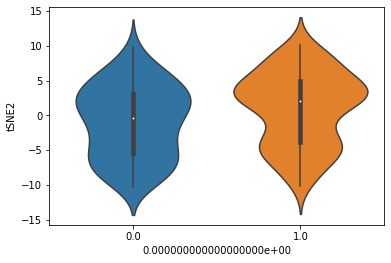

In [134]:
sns.violinplot(data=tSNE_df, x=y, y=tSNE_df["tSNE2"])